<h3>Loading Data and Counting the number of images</h3>

In [1]:
import json
import os
import cv2 

def load_data_from_json(image_dir, annotation_file):
    images = []
    annotations = []
    with open(annotation_file, 'r') as f:
        annotation_data = json.load(f)
        for image_info in annotation_data['images']:
            filename = image_info['file_name']
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path)
            images.append(image)
            image_annotations = [ann for ann in annotation_data['annotations'] if ann['image_id'] == image_info['id']]
            annotations.extend(image_annotations)
    return images, annotations

image_dir = '../HRSID_JPG/JPEGImages/'
annotation_file = '../HRSID_JPG/annotations/train_test2017.json'
images, annotations = load_data_from_json(image_dir, annotation_file)

print(f"Number of images: {len(images)}")
print(f"Number of annotations: {len(annotations)}")


Number of images: 5604
Number of annotations: 16951


<h3>Plotting the data to understand the structure of json </h3>

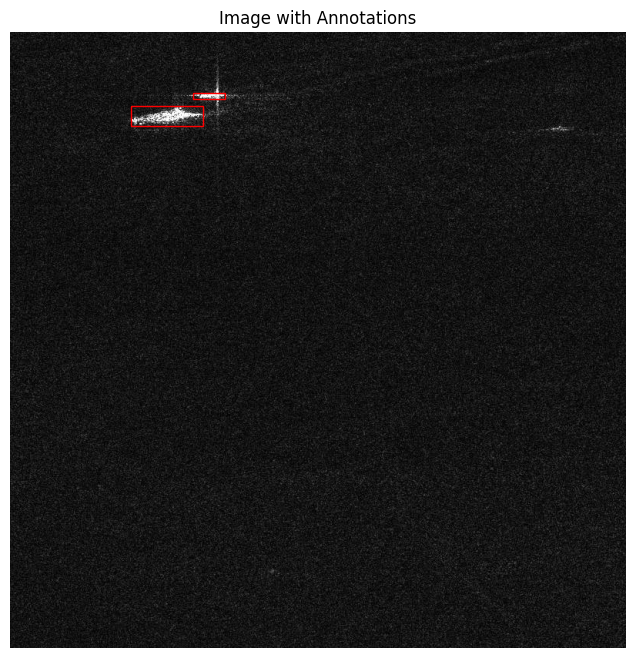

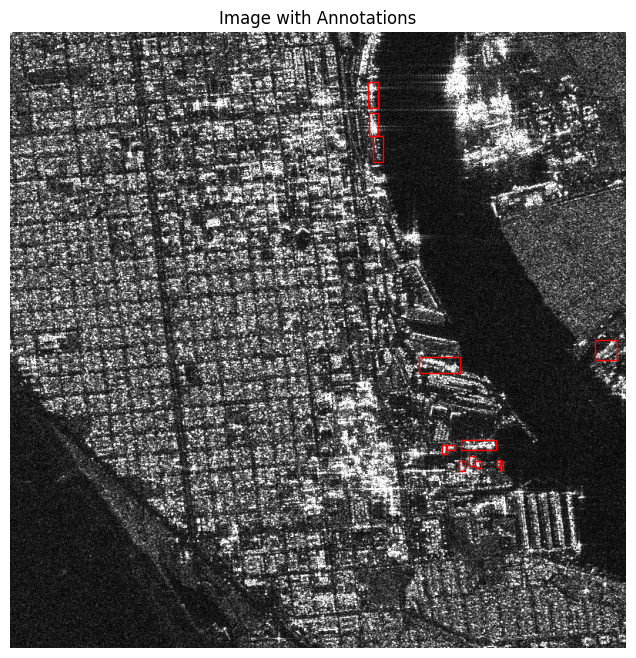

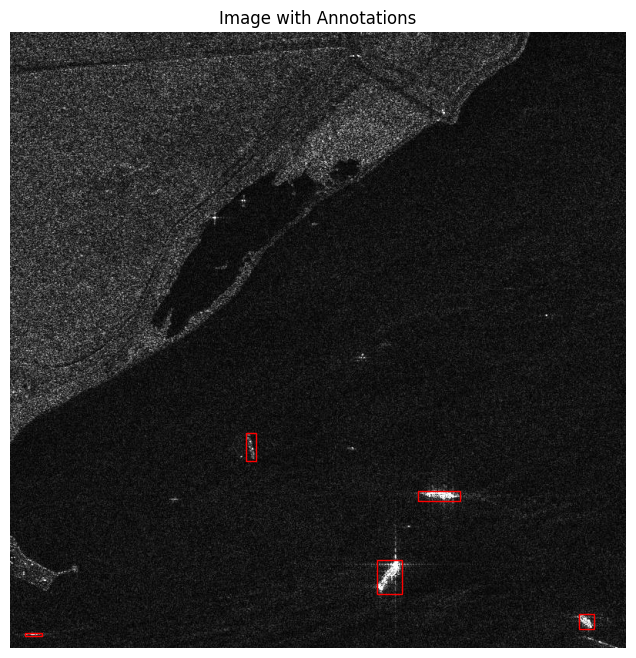

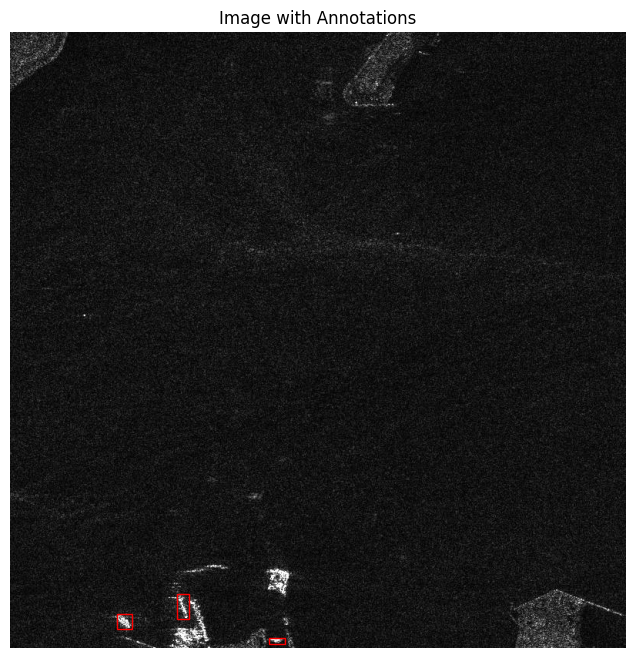

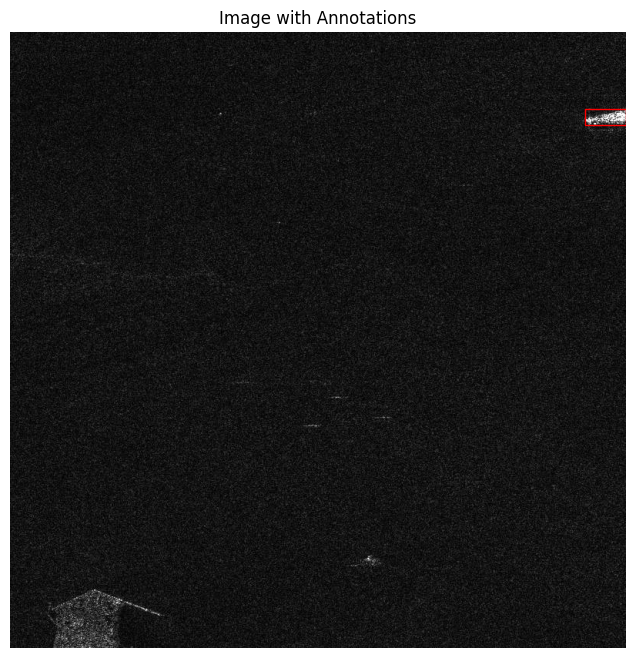

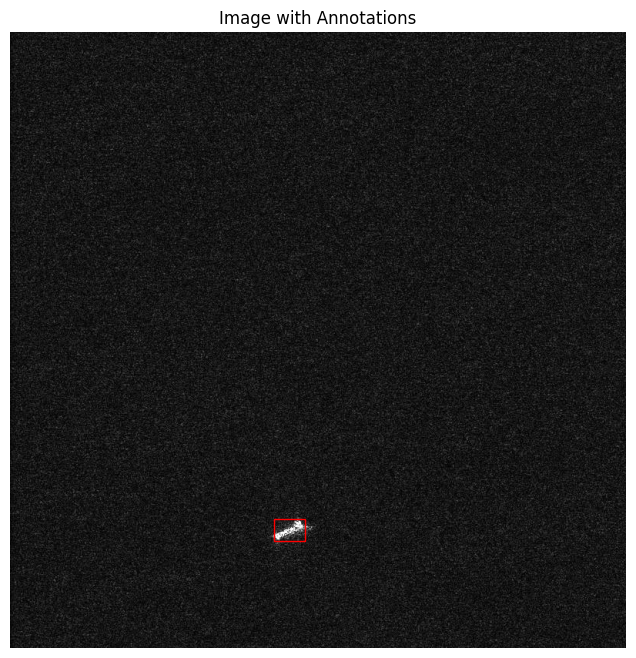

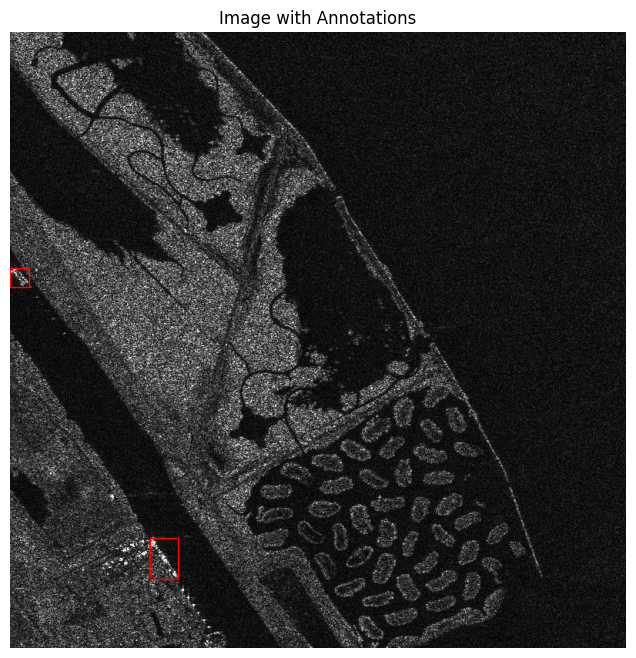

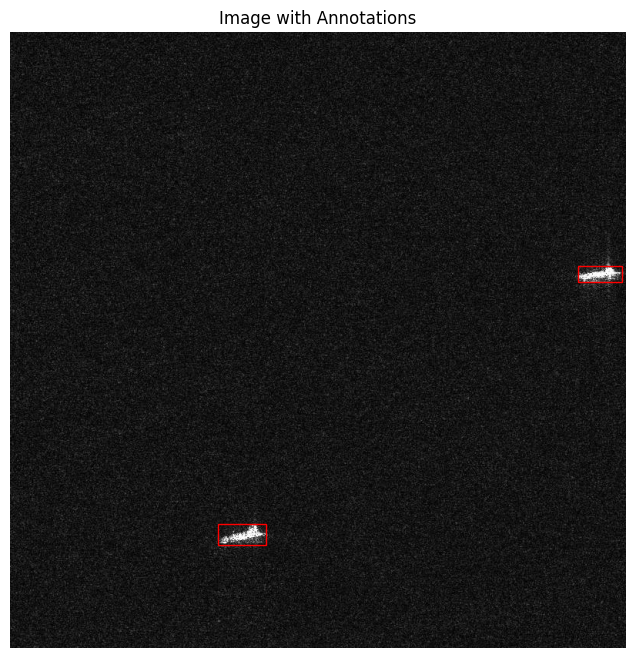

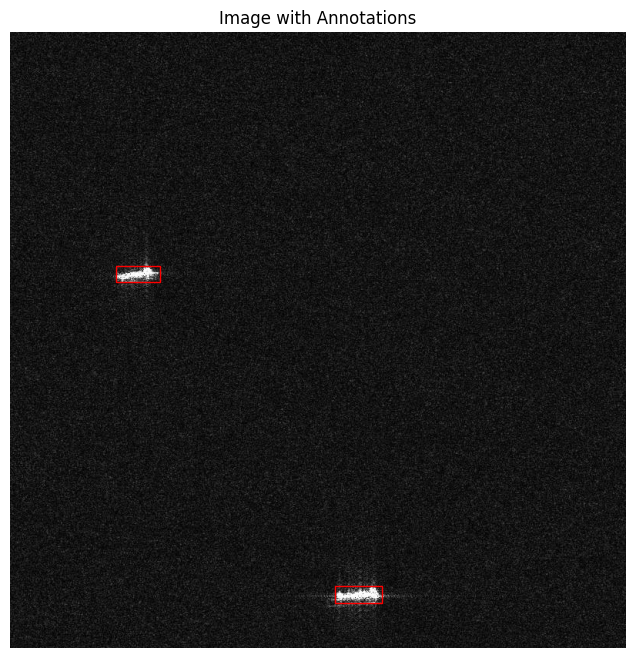

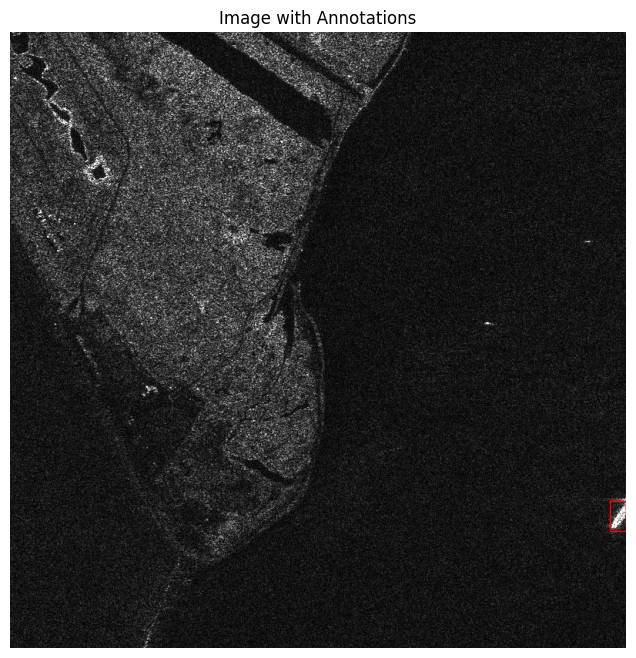

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_image_with_annotations(image, annotations):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title("Image with Annotations")
    ax.axis('off')

    for ann in annotations:
        bbox = ann['bbox']
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()
    
for i in range(10):
    image = images[i]
    image_annotations = [ann for ann in annotations if ann['image_id'] == i]
    plot_image_with_annotations(image, image_annotations)


<h3>Plotting Original image along with segmentation annotation and Bounding box annotations </h3>

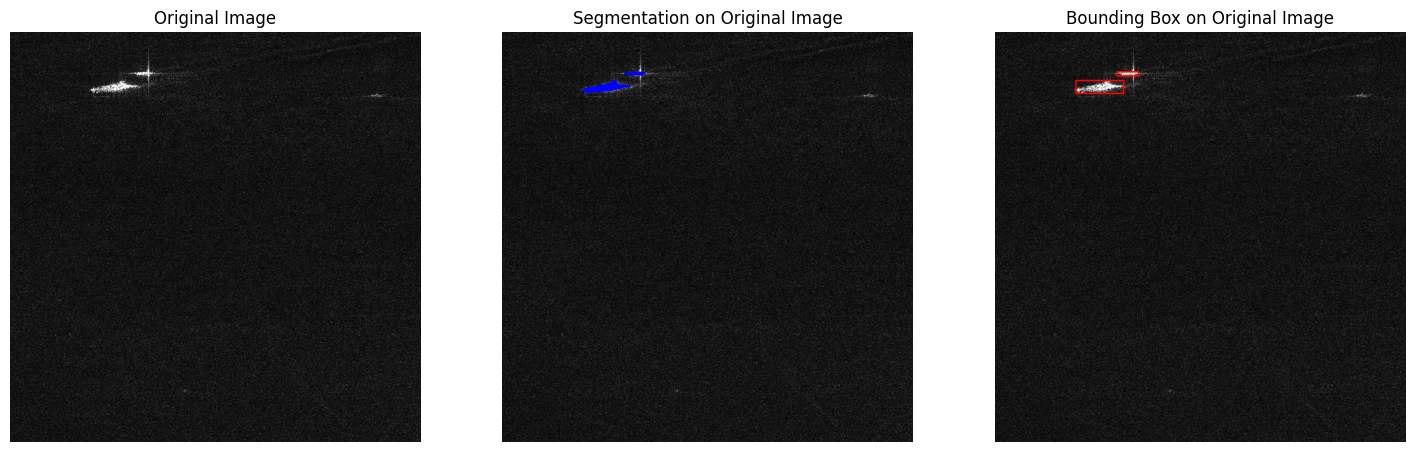

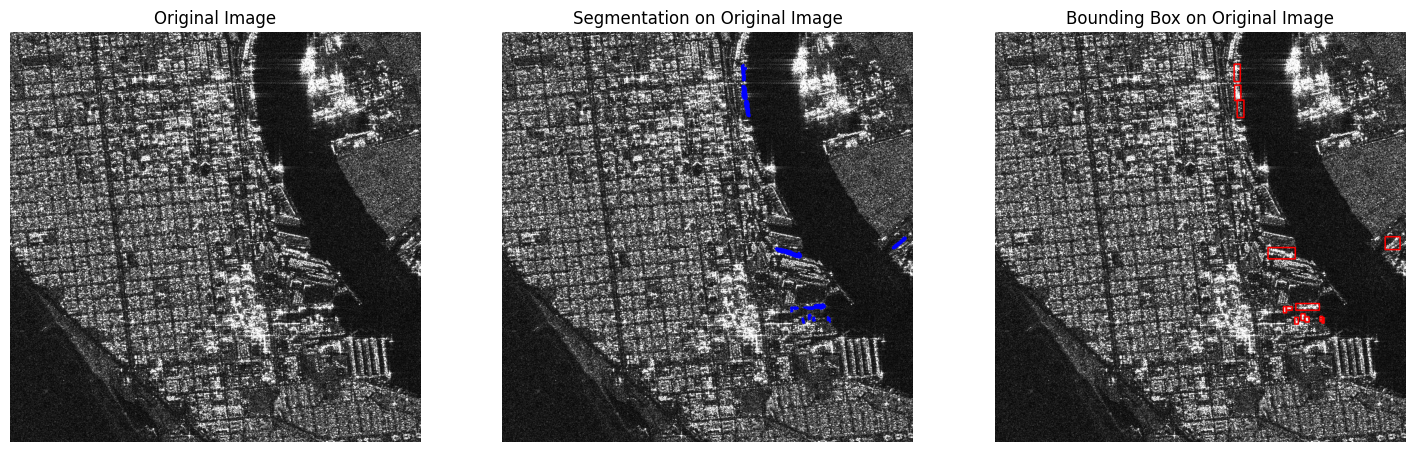

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cv2

def plot_image_with_annotations(image, annotations):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    seg_image = np.copy(image)
    for annotation in annotations:
        segmentation = annotation['segmentation']
        for seg_points in segmentation:
            seg_points = np.array(seg_points).reshape((-1, 2)).astype(np.int32)
            cv2.fillPoly(seg_image, [seg_points], (0, 0, 255))  # Darkest shade of red
    axes[1].imshow(seg_image, cmap='gray')
    axes[1].set_title("Segmentation on Original Image")
    axes[1].axis('off')
    bbox_image = np.copy(image)
    for annotation in annotations:
        bbox = annotation['bbox']
        bbox_rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='blue', facecolor='none')
        bbox_image = cv2.rectangle(bbox_image, (bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]), (255, 0, 0), 2)
    axes[2].imshow(bbox_image, cmap='gray')
    axes[2].set_title("Bounding Box on Original Image")
    axes[2].axis('off')

    plt.show()

for i in range(2):
    image = images[i]
    annotations_for_image = [ann for ann in annotations if ann['image_id'] == i]

    plot_image_with_annotations(image, annotations_for_image)
